In [1]:
import numpy as np
import pandas as pd

In [102]:
table = pd.read_excel('/Users/james/Desktop/spot.xlsx')

In [108]:
type(table)

pandas.core.frame.DataFrame

In [109]:
table_ = np.asarray(table)

In [110]:
type(table_)

numpy.ndarray

In [117]:
table_ = np.delete(table_,(0,7),axis=1)[:11,:]

In [118]:
a = np.array([0,0,1])
b = np.array([0,1,0])
c = np.array([1,0,0])

In [119]:
a = np.array([0,0,1])
b = np.array([0,1,0])
c = np.array([1,0,0])
m = np.array([])
for i in range(table_.shape[0]):
    if table_[i:i+1,6:7] == 'scene':
        m = np.concatenate((m, a), axis=0)
    elif table_[i:i+1,6:7] == 'culture':
        m = np.concatenate((m, b), axis=0)
    elif  table_[i:i+1,6:7] == 'folk':
        m = np.concatenate((m, c), axis=0)

In [122]:
m

array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  0.])

In [128]:
m = m.reshape(-1,3)

In [129]:
m

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [130]:
table_.shape

(11, 9)

In [131]:
table_ = np.concatenate((table_[:,:6],m),axis = 1).astype(float)

In [132]:
table_

array([[  1.30000000e+02,   3.00000000e+02,   7.00000000e+00,
          5.00000000e+00,   2.42000000e+02,   3.70000000e+05,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  3.40000000e+02,   5.00000000e+02,   6.00000000e+00,
          5.00000000e+00,   2.00000000e-01,   5.00000000e+05,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.50000000e+02,   4.00000000e+02,   5.50000000e+00,
          5.00000000e+00,   5.20000000e-01,   4.26000000e+05,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.60000000e+02,   4.00000000e+02,   5.00000000e+00,
          5.00000000e+00,   4.46000000e+02,   1.00000000e+05,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.38000000e+02,   2.00000000e+02,   3.50000000e+00,
          5.00000000e+00,   3.15000000e+00,   1.06300000e+05,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.50000000e+02,   3.00000000e+02,   4.00000000e+00,
   

In [12]:
price = table_[:,0:1]
cost = table_[:,1:2]
feature = table_[:,2:]

In [13]:
# keep in mind that your dataset is too small for some powerful regression method, but you 
# can just have a try

In [14]:
#linear regression
from sklearn.linear_model import LinearRegression
line = LinearRegression()

In [133]:
type(line)

sklearn.linear_model.base.LinearRegression

In [136]:
feature[:9,:].shape

(9, 7)

In [137]:
line.fit(feature[:9,:],price[:9])
line.predict(feature[9:10,:])

array([[ 140.02549283]])

In [138]:
line.coef_

array([[  7.46447135e+00,  -1.10896190e-10,  -7.35108848e-02,
          6.19926792e-06,   6.55248810e+00,  -1.59824901e+01,
          9.43000197e+00]])

In [141]:
line.fit(feature[:5,:],price[:5])
predict = line.predict(feature[5:10,:])

In [142]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


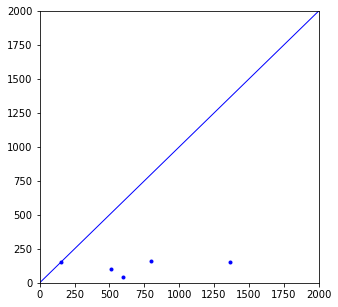

In [143]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(predict, price[5:10], marker = '.', color = 'b')
ax.set_xlim(left=0, right=2000)
ax.set_ylim(bottom=0, top=2000)
line1 = [(0, 0), (2000, 2000)]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

In [144]:
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
r2 = r2_score(predict, price[5:10])
pcc = pearsonr(predict, price[5:10])
pcc

(array([ 0.22328117]), array([ 0.71808976]))

In [17]:
#NOTE: cross validation is needed for testing overfitting
'''
the common indicator to test the model is r^2 and pcc, usage:
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
r2 = r2_score(y_test, predict)
pcc = pearsonr(y_test, prdict)
'''

'\nthe common indicator to test the model is r^2 and pcc, usage:\nfrom sklearn.metrics import r2_score\nfrom scipy.stats.stats import pearsonr\nr2 = r2_score(y_test, predict)\npcc = pearsonr(y_test, prdict)\n'

In [37]:
'''
some more models:
for novice there is no need to spend time on optimizing parameters. also the dataset is too 
small to try, but if you want a try, sklearn's grid search, random search and another package
called hyperopt is fine.

1 Ridge
from sklearn.linear_model import Ridge
rid = Ridge(alpha = 0.1)
rid.fit(X_train,y_train)
rid.predict(X_test)
2 Kernel ridge
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(alpha = 10**(-4), kernel = 'polynomial',degree = 3 )
kr.fit(X_train,y_train)
krpre = kr.predict(X_test)
3 SVM regression
#it's used for little dataset but the samples you collected may be too small for it
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train,y_train)
regpre = reg.predict(X_test)
4 Random forest
# may not be suitible, you can reduce the estimator and max depth
reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None)
reg.fit(X_train,y_train)
regpre = reg.predict(X_test)
5 KNN
# it's fast and little like k-means
from sklearn import neighbors
reg = neighbors.KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train,y_train)
6 Xgboost
# you need to install the package xgboost to use the popular machine learning package, for 
users who is used to sklearn, xgboost has the api to use sklearn method.
import xgboost
import sklearn
from xgboost.sklearn import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train,y_train)
regpre = reg.predict(X_test)
7 Gaussian process regression
#very powerful but may not be suitable
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
kernel = 1.0 * DotProduct(sigma_0=1.0)**4
reg = GaussianProcessRegressor(kernel = kernel)
reg.fit(X_train,y_train)
regpre = reg.predict(X_test)
'''

"\nsome more models:\nfor novice there is no need to spend time on optimizing parameters. also the dataset is too \nsmall to try, but if you want a try, sklearn's grid search, random search and another package\ncalled hyperopt is fine.\n\n1 Ridge\nfrom sklearn.linear_model import Ridge\nrid = Ridge(alpha = 0.1)\nrid.fit(X_train,y_train)\nrid.predict(X_test)\n2 Kernel ridge\nfrom sklearn.kernel_ridge import KernelRidge\nkr = KernelRidge(alpha = 10**(-4), kernel = 'polynomial',degree = 3 )\nkr.fit(X_train,y_train)\nkrpre = kr.predict(X_test)\n3 SVM regression\n#it's used for little dataset but the samples you collected may be too small for it\nfrom sklearn.svm import SVR\nreg = SVR()\nreg.fit(X_train,y_train)\nregpre = reg.predict(X_test)\n4 Random forest\n# may not be suitible, you can reduce the estimator and max depth\nreg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None)\nreg.fit(X_train,y_train)\nregpre = reg.predict(X_test)\n5 KNN\n# it's fast and little lik

In [145]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(feature[:5,:],price[:5])
predict = reg.predict(feature[5:10,:])

In [146]:
price[5:10]

array([[150],
       [160],
       [ 45],
       [150],
       [ 98]])

In [148]:
r2 = r2_score(predict, price[5:10].flatten())
pcc = pearsonr(predict, price[5:10].flatten())
pcc

(nan, 1.0)

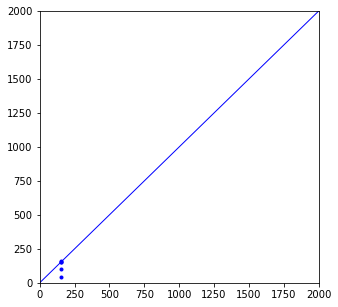

In [149]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(predict, price[5:10], marker = '.', color = 'b')
ax.set_xlim(left=0, right=2000)
ax.set_ylim(bottom=0, top=2000)
line1 = [(0, 0), (2000, 2000)]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

In [58]:
#use boston dataset

In [150]:
import sklearn
from sklearn.datasets import load_boston

In [151]:
data, target = load_boston(return_X_y = True)

In [176]:
data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [71]:
data.shape

(506, 13)

In [156]:
target.shape

(506,)

In [157]:
X_train = np.nan_to_num(data[:450,:])
X_test = np.nan_to_num(data[450:,:])
y_train = np.nan_to_num(target[:450])
y_test = np.nan_to_num(target[450:])

In [171]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)
regpre = reg.predict(X_test)

In [172]:
y_test

array([ 13.4,  15.2,  16.1,  17.8,  14.9,  14.1,  12.7,  13.5,  14.9,
        20. ,  16.4,  17.7,  19.5,  20.2,  21.4,  19.9,  19. ,  19.1,
        19.1,  20.1,  19.9,  19.6,  23.2,  29.8,  13.8,  13.3,  16.7,
        12. ,  14.6,  21.4,  23. ,  23.7,  25. ,  21.8,  20.6,  21.2,
        19.1,  20.6,  15.2,   7. ,   8.1,  13.6,  20.1,  21.8,  24.5,
        23.1,  19.7,  18.3,  21.2,  17.5,  16.8,  22.4,  20.6,  23.9,
        22. ,  11.9])

In [173]:
regpre

array([ 16.87708355,  20.00176976,  19.09748901,  23.20814177,
        15.61732627,  16.11179904,  12.89417524,  13.05769132,
        17.60907268,  19.02500872,  19.56228736,  20.75692019,
        20.32067933,  23.17521618,  20.6775203 ,  17.98688017,
        14.59451645,  17.25588675,  17.1412805 ,  18.69010269,
        20.59541332,  23.55096067,  22.86961063,  26.03505314,
        16.7222898 ,  16.34436421,  20.9957601 ,  11.65982909,
        19.64392745,  22.32837322,  23.86060017,  27.72484729,
        29.27880958,  21.24184418,  19.55375857,  22.57034245,
        20.10253864,  21.55409226,  10.87766787,   7.10159655,
         2.33531983,  12.90212573,  15.07241997,  20.2917649 ,
        20.14470152,  16.16731348,  13.60687933,  18.92620832,
        21.08772713,  18.21418431,  20.37011473,  23.66966908,
        22.54010176,  28.11813701,  26.57112983,  22.58745107])

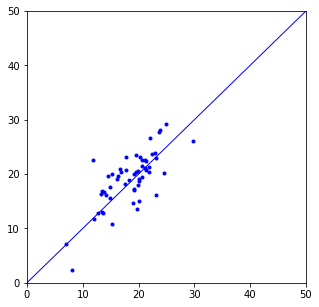

In [174]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(y_test, regpre, marker = '.', color = 'b')
ax.set_xlim(left=0, right=50)
ax.set_ylim(bottom=0, top=50)
line1 = [(0, 0), (50, 50)]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

In [175]:
r2 = r2_score(regpre, y_test)
pcc = pearsonr(regpre, y_test)
pcc

(0.74863242259924867, 3.271780198594948e-11)